## Zadanie

Niech $A \in \mathbb{R}^{M \times N}$. Znaleść macierze $W$ i $H$, takie że

$$||A - W \cdot H|| \to \min!,$$

gdzie $W$ i $H$ są wymiarów odpowiednio $M \times r$ i $r \times N$, a ponadto $rank(W), rank(H) \leq r$ oraz $W_{ij} \geq 0$ i $H_{ij} \geq 0$ dla wszystkich $i, j$.

Jest to zadanie optymalizacji z ograniczeniami.

## Zadanie (NMF - Non-negative Matrix Factorization)

Niech $A \in \mathbb{R}^{M \times N}$. Znaleźć macierze $W$ i $H$, takie że

$$||A - W \cdot H|| \to \min!,$$

gdzie $W$ i $H$ są wymiarów odpowiednio $M \times r$ i $r \times N$, a ponadto $rank(W), rank(H) \leq r$ oraz $W_{ij} \geq 0$ i $H_{ij} \geq 0$ dla wszystkich $i, j$.

Jest to zadanie optymalizacji z ograniczeniami.

## Metody przybliżonej faktoryzacji NMF

1. Spadek po gradiencie

$$W_{new} := [W + \alpha R H^T]_+, H_{new} := [H + \alpha W^T R]_+,$$

gdzie $R = A - W \cdot H$ i $([X]_+)_{i,j} = \max\{X_{i,j}, 0\}$.

2. Multyplicative Update

$$W_{new} := W * AH^T / W(HH^T)^T, H_{new} := H * W^TA / (W^TW)H,$$

gdzie $*$ i $/$ oznaczają mnożenie i dzielenie element po elemencie.

In [230]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [231]:
def nmf_gradient(A, r, alpha, max_iter=1000):
    M, N = A.shape
    W = np.random.random((M, r))
    H = np.random.random((r, N))
    for i in range(max_iter):
        R = A - W @ H
        W_new = W + alpha * R @ H.T
        H_new = H + alpha * W.T @ R
        W_new[W_new < 0] = 0
        H_new[H_new < 0] = 0
        W = W_new
        H = H_new
    return W, H

In [232]:
def nmf_mult(A, r, max_iter=1000, eps=1e-5):
    M, N = A.shape
    W = np.random.rand(M, r)
    H = np.random.rand(r, N)
    for i in range(max_iter):
        W_new = W * (A @ H.T) / (W @ H @ H.T)
        H_new = H * (W.T @ A) / (W.T @ W @ H)
        if np.linalg.norm(W_new - W) < eps and np.linalg.norm(H_new - H) < eps:
            break
        W = W_new
        H = H_new
    return W, H

In [233]:
def nmf(A, r, method='gradient', **kwargs):
    if method == 'gradient':
        return nmf_gradient(A, r, **kwargs)
    elif method == 'mult':
        return nmf_mult(A, r, **kwargs)
    else:
        raise ValueError('Unknown method')

In [234]:
def plot_nmf(A, r, method='gradient', **kwargs):
    W, H = nmf(A, r, method, **kwargs)
    diff = np.linalg.norm(A - W @ H)
    # print(W @ H)
    print(f'Norm of difference: {diff}')
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(A, cmap='gray')
    plt.title('Original')
    plt.subplot(1, 2, 2)
    plt.imshow(W @ H, cmap='gray')
    plt.title('Reconstructed')
    plt.show()

Norm of difference: 37644.16277221098


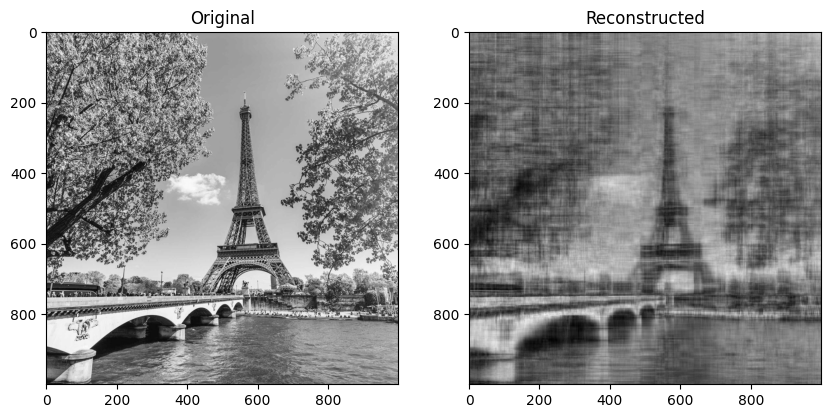

Norm of difference: 143557.69345055916


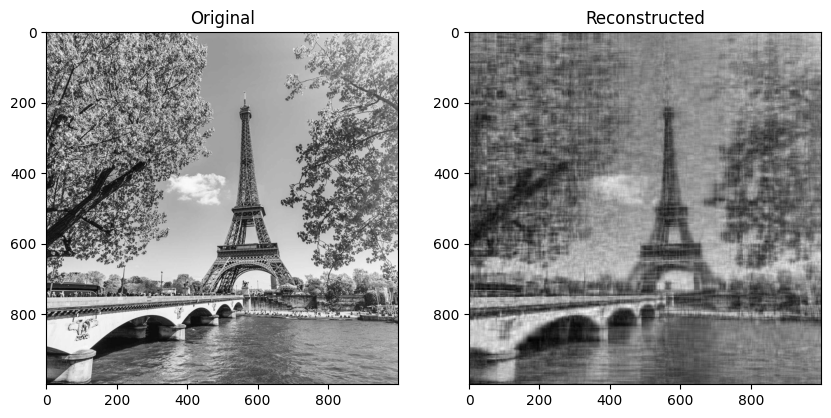

In [235]:
paris_img = np.array(Image.open('paris.jpg').convert('L').resize((1000, 1000)))
# A = np.identity(100)
# print(paris_img.shape)
A = paris_img
# A = np.random.rand(100, 100)
plot_nmf(A, 30, method='gradient', alpha=0.000001)
plot_nmf(A, 30, method='mult')